### Data Science Principles and Practices (COMM054) Lab Week 6

Follow the instructions to complete each of these tasks. This set of exercises focusses on writing basic Python code to carry out simple hypothesis testing. Do not worry if you do not complete them all in the timetabled lab session.

This is not assessed but will help you gain practical experience for the module exam and coursework.

First, import the packages we will be using in this lab:
```python
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
```

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# Test with binomial distributions

We can perform a hypothesis test that the probability of success is $p$. This is an exact, two-sided test of the **null hypothesis** that the probability of success in a Bernoulli experiment is $p$.

(**Recall**: if $X$ denotes the number of successes out of $n$ independent Bernoulli trials, with probability $p$ of success, then $X$ is distributed according to the binomial distribution, i.e. $X\sim B(n,p)$.)

We use `scipy.stats.binomtest(k, n, p=0.5, alternative='two-sided')` 

The main parameters include

* k: int or array_like. The number of successes.

* n: int. The number of trials.

* p: float (optional). The hypothesised probability of success. $0 \leq p \leq 1$. The default value is p = 0.5.

* alternative: {‘two-sided’, ‘greater’, ‘less’}, optional. Indicates the alternative hypothesis. The default value is ‘two-sided’.

The function returns a Python object that contains the **p-value** of the hypothesis test.

**Example** A car manufacturer claims that no more than 10% of their cars are unsafe. 15 cars are inspected for safety, 3 were found to be unsafe. You could test the manufacturer’s claim using the following code:

```python
result = ss.binomtest(3, n=15, p=0.1, alternative='greater')
result.pvalue # the p-value of the test
```

Note that here the hypothesis is about the unsafety, so x (the number of "successes") should be the number of unsafe cars: 3. 

More information can be found at https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binomtest.html

Try it yourself.

In [33]:
result = ss.binomtest(3, n=15, p=0.1, alternative='greater')
result.pvalue

0.18406106910639106

Note again that the returned result is the p-value.

Try other options for the `alternative` argument, and observe the change of the p-value . 

In [27]:
ss.binomtest(3, n=15, p=0.1, alternative='less')

BinomTestResult(k=3, n=15, alternative='less', statistic=0.2, pvalue=0.944444369992464)

It is instructive to calculate the p-value explicitly, rather than use `binom_test`, and to visualise it on the distribution. Let us first define a function `plot_binomial` that takes values
- `n`: number of Bernoulli trials
- `p`: probability of success of one trial
- `x_sample`: observed sample
- `alternative`: type of hypothesis test ('greater', 'less', or 'two-sided')

and outputs a plot of the binomial distribution (in blue) overlaid with the `x` values contributing to the p-value (in red), and prints the actual p-value. The code for this is:

```python
def plot_binomial(n, p, x_sample, alternative):

    rv = ss.binom(n,p)       # we assume our random variable is distributed as B(n,p)

    # plot the binomial distribution (in blue)
    fig, ax = plt.subplots(1, 1)

    x_range = np.arange(0,n+1)
    ax.plot(x_range, rv.pmf(x_range), 'bo', label='binomial pmf')
    ax.vlines(x_range, 0, rv.pmf(x_range), colors='b')
    ax.set_xticks(x_range)

    # find the values of x that contribute to the p-value, and put them in x_tail (a list, for simplicity)
    if alternative == 'greater':
        x_tail = range(x_sample,n+1)
    elif alternative == 'less':
        x_tail = range(0,x_sample+1)
    elif alternative == 'two-sided':
        x_tail = []
        for x in x_range:
            if rv.pmf(x) <= rv.pmf(x_sample) + 0.00001:
                x_tail.append(x)

    # sum the pmf on these values to find the p-value
    p_value = sum(rv.pmf(x_tail))  
    
    # plot the values that contribute to the p-value (in red)
    ax.plot(x_tail, rv.pmf(x_tail), 'ro', label='p-value')
    ax.vlines(x_tail, 0, rv.pmf(x_tail), colors='r')

    ax.legend(loc='best')
    plt.show()
    
    print("The p-value is", p_value)
    
plot_binomial(24, 0.3, 12, 'greater')  # call plot_binomial with particular values
```
You should try to understand what is happening in this code. The p-value calculation for a two-sided test requires some explanation: in this case, we look for values of x that contribute probability less than or equal to the probability of our sample (this is a convention). The additional 0.0000001 is a tolerance to account for numerical imprecision.

Try this code below:

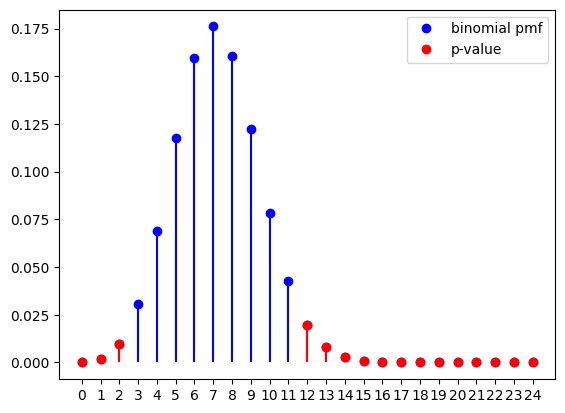

The p-value we calculate is 0.043267780620521085
The p-value calculated by binom_test is 0.043267780620521064


In [38]:
def plot_binomial(n, p, x_sample, alternative):

    rv = ss.binom(n,p)       # we assume our random variable is distributed as B(n,p)

    # plot the binomial distribution (in blue)
    fig, ax = plt.subplots(1, 1)

    x_range = np.arange(0,n+1)
    ax.plot(x_range, rv.pmf(x_range), 'bo', label='binomial pmf')
    ax.vlines(x_range, 0, rv.pmf(x_range), colors='b')
    ax.set_xticks(x_range)

    # find the values of x that contribute to the p-value, and put them in x_tail (a list, for simplicity)
    if alternative == 'greater':
        x_tail = range(x_sample,n+1)
    elif alternative == 'less':
        x_tail = range(0,x_sample+1)
    elif alternative == 'two-sided':
        x_tail = []
        for x in x_range:
            if rv.pmf(x) <= rv.pmf(x_sample) + 0.0000001:
                x_tail.append(x)

    # sum the pmf on these values to find the p-value
    p_value = sum(rv.pmf(x_tail))  
    
    # plot the values that contribute to the p-value (in red)
    ax.plot(x_tail, rv.pmf(x_tail), 'ro', label='p-value')
    ax.vlines(x_tail, 0, rv.pmf(x_tail), colors='r')

    ax.legend(loc='best')
    plt.show()
    
    print("The p-value we calculate is", p_value)
    print("The p-value calculated by binom_test is", ss.binomtest(x_sample, n, p, alternative).pvalue)
    
plot_binomial(24, 0.3, 12, 'two-sided')

In order to experiment with different values of `n`, `p`, `x_sample`, and `alternative`, it is useful to make this interactive. We can do this using the `ipywidgets` package (see https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html for further details). 

We first need to install the package, if it is not already installed:

`!pip install ipywidgets`

(The exclamation mark indicates the command is to be passed to the OS.) Try this below:

In [5]:
!pip install ipywidgets

We then import the everything from `ipywidgets`
```python
from ipywidgets import *
```

Next we define widgets for each argument of `plot_binomial`
```python
n_widget = IntSlider(max=24, value=12)
p_widget = FloatSlider(min=0, max=1, step=0.1, value=0.5)
x_sample_widget = IntSlider(max=24, value=6)
alternative_widget = Dropdown(options=['greater', 'less', 'two-sided'])
```
We would like the maximum value of `x_sample` to equal the value of `n`. This is achieved using
```python
def update_x_sample_range(*args):
    x_sample_widget.max = n_widget.value
n_widget.observe(update_x_sample_range, 'value')
```
Finally, we call `plot_binomial` with the values of the widgets
```python
interactive(plot_binomial, n=n_widget, p=p_widget, x_sample = x_sample_widget, alternative = alternative_widget)
```

Try this code below:

In [39]:
from ipywidgets import *
    
# define widgets
n_widget = IntSlider(max=24, value=12)
p_widget = FloatSlider(min=0, max=1, step=0.1, value=0.5)
x_sample_widget = IntSlider(max=24, value=6)
alternative_widget = Dropdown(options=['greater', 'less', 'two-sided'])

# update x_sample range based on n value 
def update_x_sample_range(*args):
    x_sample_widget.max = n_widget.value
n_widget.observe(update_x_sample_range, 'value')

# call plot_binomial using widget values
interactive(plot_binomial, n=n_widget, p=p_widget, x_sample = x_sample_widget, alternative = alternative_widget)

interactive(children=(IntSlider(value=12, description='n', max=24), FloatSlider(value=0.5, description='p', ma…

You should play around with the different values of the arguments, and make sure you understand what is happening in each case.

### Task 1

Generate a random sample of size 50 from the Bernoulli distribution with probability 0.6. Use your sample to test the null hypothesis vs. the alternative

* $H_0: p=0.5$  
* $H_1: p\neq 0.5$

at significance level 5%, where $p$ is the probability of success of one Bernoulli trial. (You may use `binom_test` to calculate the p-value.) Use an `if-then-else` statement to output your conclusion.

In [34]:
n = 50   # number of independent Bernoulli trials

sig_level = 0.05  # significance level

# for a change, we sample n times from a Bernoulli distribution, rather than once from a binomial distribution
sample = ss.bernoulli.rvs(0.6, size=n)

succ = np.sum(sample)   # add up all the successful trials

p_value = ss.binomtest(succ, n=n, p=0.5, alternative='two-sided').pvalue

print("The number of successful trials is " + str(succ) + " out of " + str(n))
print("The p-value of the generated sample is", p_value)

if p_value < sig_level:
    print("The null hypothesis is rejected")
else:
    print("The null hypothesis is not rejected")

The number of successful trials is 34 out of 50
The p-value of the generated sample is 0.015346677832630107
The null hypothesis is rejected


### Task 2 
Modify the interactive binomial distribution example above to display a Poisson distribution, and plot the corresponding p-value over the distribution. Note, in this case there are an infinite set of possible `x` values, so you will need to have a maximum value for `x_range` - for example, you could choose `int(np.ceil(3*mu))`, where `mu` is the mean of the Poisson distribution. (Also, there is no `scipy.stats` equivalent of `binomtest` for the Poisson distribution.)

In [8]:
def plot_poisson(mu, x_sample, alternative):

    rv = ss.poisson(mu)       # we assume our random variable is distributed as Pois(mu)

    # plot the Poisson distribution (in blue)
    fig, ax = plt.subplots(1, 1)
    
    x_max = int(np.ceil(3*mu))
    x_range = np.arange(0,x_max+1)
    ax.plot(x_range, rv.pmf(x_range), 'bo', label='Poisson pmf')
    ax.vlines(x_range, 0, rv.pmf(x_range), colors='b')
    ax.set_xticks(x_range)

    # find the values of x that contribute to the p-value, and put them in x_tail (a list, for simplicity)
    if alternative == 'greater':
        x_tail = range(x_sample, x_max+1)
    elif alternative == 'less':
        x_tail = range(0,x_sample+1)
    elif alternative == 'two-sided':
        x_tail = []
        for x in x_range:
            if rv.pmf(x) <= rv.pmf(x_sample) + 0.0000001:
                x_tail.append(x)

    # sum the pmf on these values to find the p-value
    p_value = sum(rv.pmf(x_tail))  
    
    # plot the values that contribute to the p-value (in red)
    ax.plot(x_tail, rv.pmf(x_tail), 'ro', label='p-value')
    ax.vlines(x_tail, 0, rv.pmf(x_tail), colors='r')

    ax.legend(loc='best')
    plt.show()
    
    print("The p-value we calculate is", p_value)
    
# define widgets
mu_widget = FloatSlider(max=8, step=0.5, value=4)
x_sample_widget = IntSlider(max=3*4, value=6)
alternative_widget = Dropdown(options=['greater', 'less', 'two-sided'])

# update x_sample range based on n value 
def update_x_sample_range(*args):
    x_sample_widget.max = int(np.ceil(3*mu_widget.value))
mu_widget.observe(update_x_sample_range, 'value')

# call plot_binomial using widget values
interactive(plot_poisson, mu=mu_widget, x_sample = x_sample_widget, alternative = alternative_widget)

interactive(children=(FloatSlider(value=4.0, description='mu', max=8.0, step=0.5), IntSlider(value=6, descript…

# Z-test

Recall that a Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution. Z-test tests the mean of a distribution.

We will first describe how to implement Z-tests "by hand" (using the built-in functions of `scipy.stats`). Later, we will discuss a package that performs Z-tests automatically from the data.

## Z-test with unknown $\mu$, known $\sigma$

Assume we have a random variable $X$ that is distributed normally, i.e. $X\sim N(\mu,\sigma)$, and assume first that $\sigma$ is known but $\mu$ is unknown. If $X_1, X_2, \ldots, X_n$ are $n$ independent RVs with the same distribution as $X$, the sample mean $\overline{X} = \frac{1}{n}\sum_{i=1}^n X_i$ is also distributed normally, with
$$\overline{X} \sim N\left(\mu, \frac{\sigma^2}{n}\right)$$ 
(In fact, by the Central Limit Theorem, this is approximately true for $X$ distributed according to **any** distribution, so long as $\mu = E(X)$ and $\sigma^2 = E(X^2)-E(X)^2$ are both finite, and $n$ is sufficiently large).

Consider the null and alternative hypotheses:

- $H_0: \mu = \mu_0$
- $H_1: \mu > \mu_0$

Suppose we now take a sample $x_1, x_2, \ldots, x_n$, and calculate the corresponding sample mean $\overline{x}$. As discussed in lecture, the p-value associated with $\overline{x}$ is simply 
$$P(\overline{X}\ge \overline{x}\vert H_0),$$
i.e. the probability that $\overline{X}\ge \overline{x}$ given that the null hypothesis is true.

We can use `scipy.stats` to directly calculate this probability, and do not need to standardise the random variable. However it is useful to do so, in order to compare different cases, as well as connect our results with those using Student's t-distribution (see later). Since under the null hypothesis $\mu = \mu_0$, we define the new RV
$$
Z = \frac{\overline{X}-\mu_0}{\sigma/\sqrt{n}}
$$
If the null hypothesis holds, then $Z\sim N(0,1)$, and hence
$$
P(\overline{X}\ge \overline{x}\vert H_0) = P\left( Z\ge \frac{\overline{x}-\mu_0}{\sigma/\sqrt{n}}\right) = 1 - \Phi\left( \frac{\overline{x}-\mu_0}{\sigma/\sqrt{n}}\right),
$$
where $\Phi$ is the CDF for $Z\sim N(0,1)$.

### Task 3

You sample a random variable $X$ 9 times, and observe the following data

`data = [12.87197349, 3.7943952, 14.80898969, 1.70545568, 3.18612627, 10.89234116, 5.75513941, 4.98645499, 9.79966628]`

You have reasons to believe that $X$ is distributed normally with standard deviation 4, i.e. $X\sim N(\mu, 4^2)$, but you don't know the mean $\mu$ of the distribution. You wish to test the following null vs. alternative hypotheses:

- $H_0: \mu = 5$
- $H_1: \mu > 5$

i) calculate the sample mean $\bar{x}$ for your observed data

ii) calculate the corresponding p-value for the null hypothesis
- by evaluating $P(\overline{X}\ge \overline{x}|H_0)$ directly, and
- by evaluating $P\left(Z \ge \frac{\overline{x}-5}{4/\sqrt{9}}\right)$, where $Z\sim N(0,1)$
   
and hence demonstrate these two values agree.

iii) based on your calculated p-value, is there evidence to reject the null hypothesis at 5% significance level?

iv) how many standard deviations above null hypothesis mean of 5 does the sample mean $\bar{x}$ lie?

In [9]:
data = [12.87197349, 3.7943952, 14.80898969, 1.70545568, 3.18612627, 10.89234116, 5.75513941, 4.98645499, 9.79966628]
x_bar = np.mean(data)

print("The sample mean is", x_bar)

p1 = 1-ss.norm.cdf(x_bar, loc=5, scale=4/3)
p2 = 1-ss.norm.cdf((x_bar-5)/(4/3), loc=0, scale=1)

print("The two calculated p-values are", p1, "and", p2)

if p1<=0.05:
    print("There is evidence to reject the null hypothesis (at 5% significance)")
else: print("There is no evidence to reject the null hypothesis (at 5% signficance)")

print("The sample mean lies", (x_bar-5)/(4/3), " standard deviations above 5")

The sample mean is 7.533393574444444
The two calculated p-values are 0.02871359536605278 and 0.02871359536605278
There is evidence to reject the null hypothesis (at 5% significance)
The sample mean lies 1.9000451808333332  standard deviations above 5


Let's try to visualise this. First, define a function that will plot a standard normal distribution $N(0,1)$, along with the p-value for a given sample and testing method.

```python
def plot_normal(x_sample, alternative):

    rv = ss.norm()      # we assume our random variable is distributed as N(0,1)

    # plot the normal distribution (in blue)
    fig, ax = plt.subplots(1, 1)
    
    x_min, x_max = -3, 3
    x_range = np.linspace(x_min, x_max, 100)
    ax.plot(x_range, rv.pdf(x_range), 'b-', label='normal pdf')

    # find the values of x that contribute to the p-value, and put them in x_tail
    if alternative == 'greater':
        p_value = 1-rv.cdf(x_sample)
        x_tail = np.linspace(x_sample, x_max)
        ax.fill_between(x_tail, rv.pdf(x_tail), color='red', label='p-value')
    elif alternative == 'less':
        p_value = rv.cdf(x_sample)
        x_tail = np.linspace(x_min, x_sample+1,100)
        ax.fill_between(x_tail, rv.pdf(x_tail), color='red', label='p-value')
    elif alternative == 'two-sided':
        p_value = 2*rv.cdf(-abs(x_sample))
        ax.fill_between(x_range, rv.pdf(x_range), where = abs(x_range)>=abs(x_sample), color='red', label='p-value')
        
    ax.legend(loc='best')
    plt.show()
    
    print("The p-value we calculate is", p_value)
    
plot_normal(1.5,'two-sided')
```

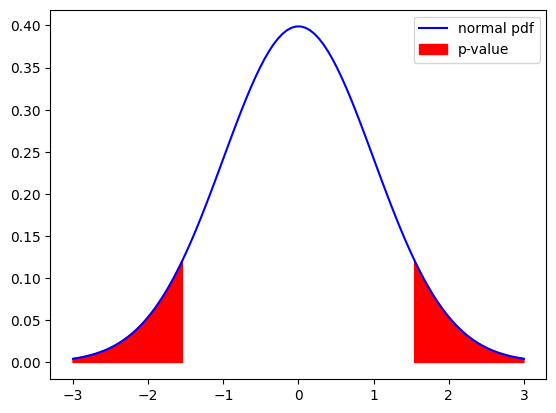

The p-value we calculate is 0.13361440253771614


In [10]:
def plot_normal(x_sample, alternative):

    rv = ss.norm()      # we assume our random variable is distributed as N(0,1)

    # plot the normal distribution (in blue)
    fig, ax = plt.subplots(1, 1)
    
    x_min, x_max = -3, 3
    x_range = np.linspace(x_min, x_max, 100)
    ax.plot(x_range, rv.pdf(x_range), 'b-', label='normal pdf')

    # find the values of x that contribute to the p-value, and put them in x_tail
    if alternative == 'greater':
        p_value = 1-rv.cdf(x_sample)
        x_tail = np.linspace(x_sample, x_max)
        ax.fill_between(x_tail, rv.pdf(x_tail), color='red', label='p-value')
    elif alternative == 'less':
        p_value = rv.cdf(x_sample)
        x_tail = np.linspace(x_min, x_sample,100)
        ax.fill_between(x_tail, rv.pdf(x_tail), color='red', label='p-value')
    elif alternative == 'two-sided':
        p_value = 2*rv.cdf(-abs(x_sample))
        ax.fill_between(x_range, rv.pdf(x_range), where = abs(x_range)>=abs(x_sample), color='red', label='p-value')
        
    ax.legend(loc='best')
    plt.show()
    
    print("The p-value we calculate is", p_value)
    
plot_normal(1.5,'two-sided')

In our case, 
$$
Z = \frac{\overline{X}-5}{4/3}
$$
The sample mean is `x_bar = np.mean(data) = 7.533393574444444`, and the type of test is `'greater'`. So the p-value is visualised by

```python
plot_normal((np.mean(data)-5)/(4/3), 'greater')
```

Try this now:

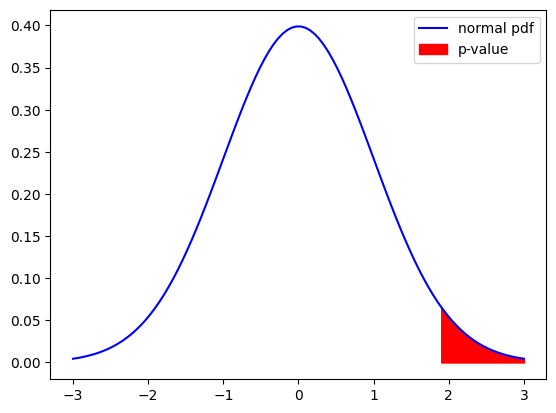

The p-value we calculate is 0.02871359536605278


In [11]:
plot_normal((np.mean(data)-5)/(4/3), 'greater')

### Task 4

Generate 100 samples from a normal distribution $N(5.5,4^2)$. Assume the standard deviation $\sigma = 4$ is known. Use `plot_normal` to visualise and calculate the p-value associated with the hypotheses test,

- $H_0: \mu = 5$
- $H_1: \mu \ne 5$

Is there enough evidence to reject $H_0$ at the 5% significance level? Repeat the experiment several times, and see whether there is any consistency in accepting or rejecting $H_0$.

The sample mean is 6.345450106049141


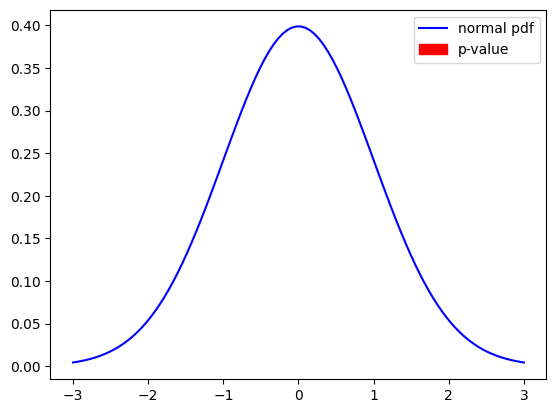

The p-value we calculate is 0.0007692591716107363


In [36]:
x_samples = ss.norm.rvs(loc=5.5, scale=4, size=100)
x_bar = np.mean(x_samples)
print("The sample mean is", x_bar)

plot_normal((x_bar-5)/(4/10), 'two-sided')

You should observe that sometime you will have enough evidence to reject $H_0$ at 5% significance, and sometimes you won't. This illustrates that hypothesis tests do not always lead to choosing the correct hypothesis. (Of course, $H_0$ is in fact **false** in this case - the true mean is 5.5, not 5.)

## Z-test with unknown $\mu$ and $\sigma$, large sample size

Again we assume $X\sim N(\mu, \sigma^2)$, but this time both $\mu$ and $\sigma$ are unknown. We sample $n$ times from this distribution, and assume $n$ is large (>=30). To perform the hypothesis test

- $H_0: \mu = \mu_0$
- $H_1: \mu > \mu_0$

we define the new statistic 
$$ 
T = \frac{X-\mu_0}{S/\sqrt{n}}, \qquad \text{where }S^2 = \frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X})^2
$$

It can be shown that for $n$ large, $T \sim N(0,1)$ approximately. This amounts to replacing $\sigma$ by 
the unbiased sample mean $s$, where
$$
s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{x})^2 = \frac{1}{n-1}\left(\sum_{i=1}^n x_i^2 - n\overline{x}^2\right),
$$
Recall, $S^2$ is an unbiased estimator of the variance $\sigma^2$.

### Task 5

Generate 100 samples from a normal distribution $N(5.5,4^2)$. Assume the standard deviation $\sigma$ is now unknown. Calculate the sample mean and unbiased sample standard deviation. Use `plot_normal` to visualise and calculate the p-value associated with the hypotheses test,

- $H_0: \mu = 5$
- $H_1: \mu \ne 5$

Is there enough evidence to reject $H_0$ at the 5% significance level? Repeat the experiment several times, and see whether there is any consistency in accepting or rejecting $H_0$.

The sample mean is 5.962450852225417
The sample standard deviation is 3.9298011346919655


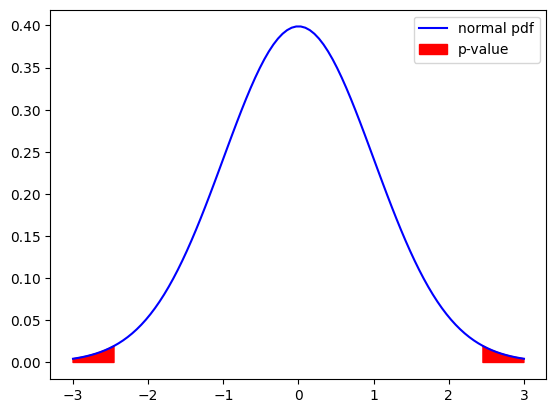

The p-value we calculate is 0.014321038623367484


In [13]:
x_samples = ss.norm.rvs(loc=5.5, scale=4, size=100)
x_bar = np.mean(x_samples)
s = np.std(x_samples, ddof=1)
print("The sample mean is", x_bar)
print("The sample standard deviation is", s)

plot_normal((x_bar-5)/(s/10), 'two-sided')

You should observe results that are similar to the case of known $\sigma$. Note in particular that since the number of samples is large, the sample standard deviation is a reasonable approximation to the true standard deviation of 4.

## Hypothesis testing for unknown $\mu$ and $\sigma$, small sample size

Again we assume $X\sim N(\mu, \sigma^2)$, where $\mu$ and $\sigma$ are unknown, and we sample $n$ times from this distribution. To perform the hypothesis test

- $H_0: \mu = \mu_0$
- $H_1: \mu > \mu_0$

we again define 
$$ 
T = \frac{X-\mu_0}{S/\sqrt{n}}, \qquad \text{where }S^2 = \frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X})^2
$$
It can be shown that $T \sim t_{n-1}$, Student's t-distribution with $n-1$ degrees of freedom. This distribution is represented in `scipy.stats` by `t(df)`, where `df` is the degrees of freedom. We plot $t_{n-1}$ for $n=5$ vs the normal distribution $N(0, 1)$ with the following code:

```python
fig, ax = plt.subplots(1,1)

n = 5
x_range = np.linspace(-4,4,100)
ax.plot(x_range, ss.t.pdf(x_range, n-1), color='blue', label='t_4')
ax.plot(x_range, ss.norm.pdf(x_range), color='orange', label='N(0,1)')

ax.legend(loc='best')
plt.show()
```
Try this:

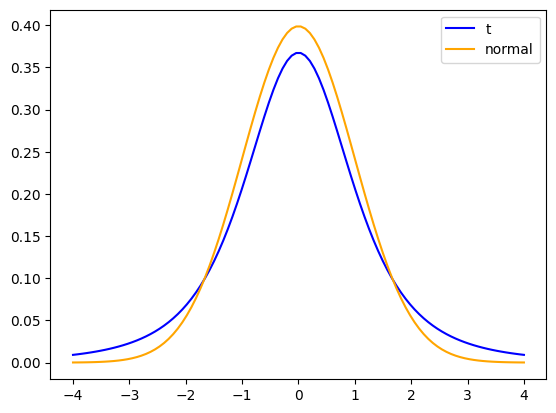

In [14]:
fig, ax = plt.subplots(1,1)

n = 4
x_range = np.linspace(-4,4,100)
ax.plot(x_range, ss.t.pdf(x_range, n-1), color='blue', label="t")
ax.plot(x_range, ss.norm.pdf(x_range), color='orange', label='normal')

ax.legend(loc='best')
plt.show()

Observe that by comparison with the normal distribution, the t-distribution has fatter tails. You should try different values of the sample size `n` in the above graph - you should see that as $n$ increases, the t-distribution approximates the normal distribution (which is why for large sample sizes, we say $T\sim N(0,1)$, and use the standard normal distribution to calculate our p-values).

### Task 6
Taking again 

`data = [12.87197349, 3.7943952, 14.80898969, 1.70545568, 3.18612627, 10.89234116, 5.75513941, 4.98645499, 9.79966628]`

and assuming that $X\sim N(\mu,\sigma^2)$ with $\mu,\sigma$ both unknown, perform the hypothesis test

- $𝐻_0: \mu=5$ 
- $𝐻_1: \mu>5$

by calculating the p-value $P\left(T>\frac{\overline{x}-5}{s/3}\right)$. Is there evidence to reject $H_0$ at 5% significance? Compare this to the results obtained in Task 3.

In [15]:
data = [12.87197349, 3.7943952, 14.80898969, 1.70545568, 3.18612627, 10.89234116, 5.75513941, 4.98645499, 9.79966628]
x_bar = np.mean(data)
s = np.std(data, ddof=1)

print("The sample mean is", x_bar)
print("The sample standard deviation is", s)

p = 1-ss.t.cdf((x_bar-5)/(s/3), df=8)

print("The calculated p-value is", p)

if p<=0.05:
    print("There is evidence to reject the null hypothesis (at 5% significance)")
else: print("There is no evidence to reject the null hypothesis (at 5% signficance)")
    
# By contrast with Task 3, we no longer have enough evidence to reject H_0
# The p-value is greater due to the fatter tails in the t-distribution

The sample mean is 7.533393574444444
The sample standard deviation is 4.668324661992019
The calculated p-value is 0.07108416121124916
There is no evidence to reject the null hypothesis (at 5% signficance)
